In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
final_df = pd.read_csv('df_final_sku_store_quarter_v3.csv')
final_df.head()

,STORE,COUNT_ITEMS,MenRatio,White,Asian,Income,Poverty,Professional,Construction,Unemployment,...,VENDOR,BRAND,CLASSID,CITY,STATE,ZIP,COST,RETAIL,PROF_MARG,DISCOUNTED
0,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,5016699,TIMBERLA,913,TAMPA,FL,33607,38.0,79.0,0.481013,True
1,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,6713105,INTERNAT,203,TAMPA,FL,33607,2.0,3.0,0.666667,True
2,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,9520439,BALI/HEN,873,TAMPA,FL,33607,8.0,18.0,0.444444,False
3,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,5010255,ENZO ANG,214,TAMPA,FL,33607,28.5,60.0,0.475000,False
4,102,96312,0.514077,68.120896,1.543284,47144.328358,17.150746,31.208955,12.074627,7.765672,...,5010255,ENZO ANG,214,TAMPA,FL,33607,28.5,60.0,0.475000,True


In [5]:
# null value appears in brand column
final_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6053441 entries, 0 to 6053440
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   STORE                 6053441 non-null  int64  
 1   COUNT_ITEMS           6053441 non-null  int64  
 2   MenRatio              6053441 non-null  float64
 3   White                 6053441 non-null  float64
 4   Asian                 6053441 non-null  float64
 5   Income                6053441 non-null  float64
 6   Poverty               6053441 non-null  float64
 7   Professional          6053441 non-null  float64
 8   Construction          6053441 non-null  float64
 9   Unemployment          6053441 non-null  float64
 10  SKU                   6053441 non-null  int64  
 11  quarter               6053441 non-null  object 
 12  totalunitssold        6053441 non-null  int64  
 13  averageoriginalprice  6053441 non-null  float64
 14  averagesellingprice   6053441 non-

In [6]:
final_df.dropna(inplace=True)


In [7]:
# Convert 'STORE', 'SKU', 'VENDOR', and 'ZIP' columns to 'object' (string) type
final_df['STORE'] = final_df['STORE'].astype('object')
final_df['SKU'] = final_df['SKU'].astype('object')
final_df['VENDOR'] = final_df['VENDOR'].astype('object')
final_df['ZIP'] = final_df['ZIP'].astype('object')

# Check the new data types
final_df.dtypes

STORE                    object
COUNT_ITEMS               int64
MenRatio                float64
White                   float64
Asian                   float64
Income                  float64
Poverty                 float64
Professional            float64
Construction            float64
Unemployment            float64
SKU                      object
quarter                  object
totalunitssold            int64
averageoriginalprice    float64
averagesellingprice     float64
purchase_count            int64
return_count              int64
purchase_prob           float64
DEPT                      int64
PACKSIZE                  int64
VENDOR                   object
BRAND                    object
CLASSID                  object
CITY                     object
STATE                    object
ZIP                      object
COST                    float64
RETAIL                  float64
PROF_MARG               float64
DISCOUNTED                 bool
dtype: object

In [8]:
final_df.describe()

,COUNT_ITEMS,MenRatio,White,Asian,Income,Poverty,Professional,Construction,Unemployment,totalunitssold,averageoriginalprice,averagesellingprice,purchase_count,return_count,purchase_prob,DEPT,PACKSIZE,COST,RETAIL,PROF_MARG
count,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06,6.034117e+06
mean,6.833415e+04,5.037173e-01,6.900491e+01,1.092374e+00,4.738793e+04,1.736665e+01,3.041933e+01,1.328318e+01,6.956569e+00,4.502643e+00,3.451118e+01,2.343334e+01,4.196135e+00,3.064876e-01,9.370936e-01,4.420213e+03,1.687533e+00,1.462900e+01,1.935599e+01,inf
std,1.686854e+04,8.311730e-03,1.328056e+01,6.871070e-01,4.820684e+03,2.944200e+00,1.877914e+00,1.873315e+00,1.466457e+00,9.225121e+00,3.438062e+01,2.309338e+01,8.952212e+00,7.131517e-01,1.336398e-01,2.576876e+03,6.912992e+00,1.450908e+01,2.251704e+01,NaN
min,3.058300e+04,4.870162e-01,4.198485e+01,4.678571e-01,3.701872e+04,1.119570e+01,2.809552e+01,9.963636e+00,2.847312e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.594500e+04,4.967678e-01,5.655787e+01,7.575758e-01,4.326879e+04,1.633504e+01,2.915786e+01,1.207463e+01,6.028346e+00,2.000000e+00,1.500000e+01,9.990000e+00,2.000000e+00,0.000000e+00,1.000000e+00,2.102000e+03,1.000000e+00,6.980000e+00,8.000000e+00,4.900000e-01
50%,6.671800e+04,5.037551e-01,6.812090e+01,9.807087e-01,4.714433e+04,1.715075e+01,2.939567e+01,1.300800e+01,7.344211e+00,3.000000e+00,2.500000e+01,1.799000e+01,2.000000e+00,0.000000e+00,1.000000e+00,4.402000e+03,1.000000e+00,1.100000e+01,1.475000e+01,7.000000e-01
75%,8.083900e+04,5.090568e-01,8.292045e+01,1.293333e+00,4.989434e+04,2.019333e+01,3.120896e+01,1.453594e+01,7.871875e+00,4.000000e+00,4.400000e+01,2.999000e+01,4.000000e+00,0.000000e+00,1.000000e+00,6.404000e+03,1.000000e+00,1.821000e+01,2.250000e+01,1.266667e+00
max,1.131880e+05,5.181672e-01,9.181000e+01,7.070690e+00,6.104676e+04,2.494146e+01,3.661607e+01,1.764118e+01,1.000732e+01,1.395000e+03,1.200000e+03,2.005200e+03,1.382000e+03,4.700000e+01,1.000000e+00,9.801000e+03,8.010000e+02,5.750000e+02,1.200000e+03,inf


In [9]:
final_df['PROF_MARG'].describe()



count    6.034117e+06
mean              inf
std               NaN
min      0.000000e+00
25%      4.900000e-01
50%      7.000000e-01
75%      1.266667e+00
max               inf
Name: PROF_MARG, dtype: float64

In [10]:
final_df['PROF_MARG'].replace([np.inf, -np.inf], np.nan, inplace=True)
final_df = final_df.dropna(subset=['PROF_MARG'])

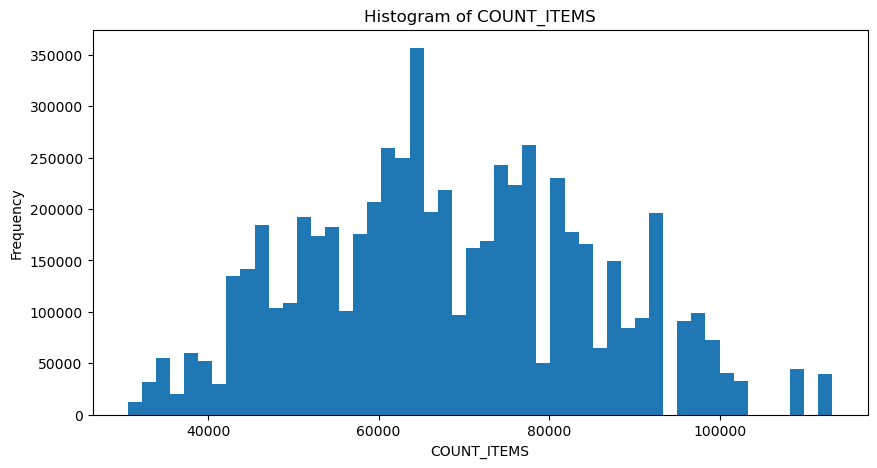

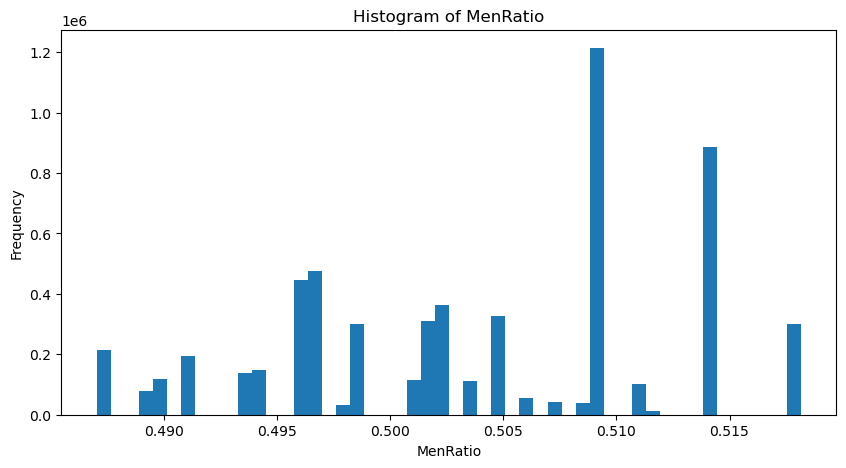

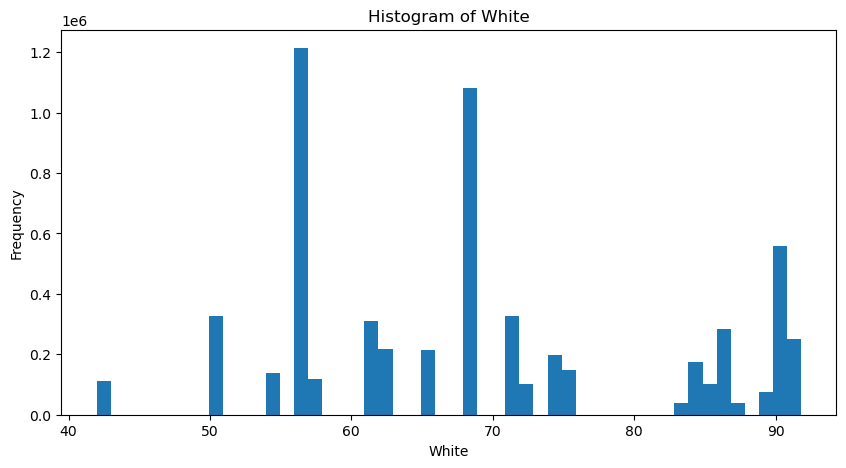

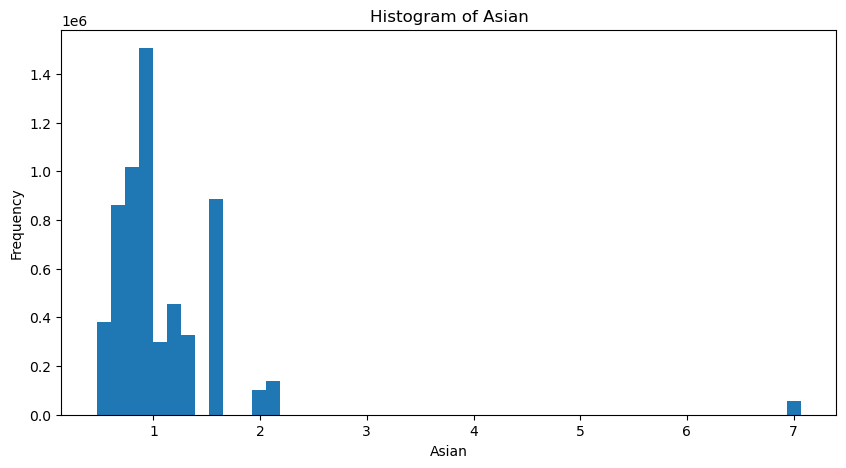

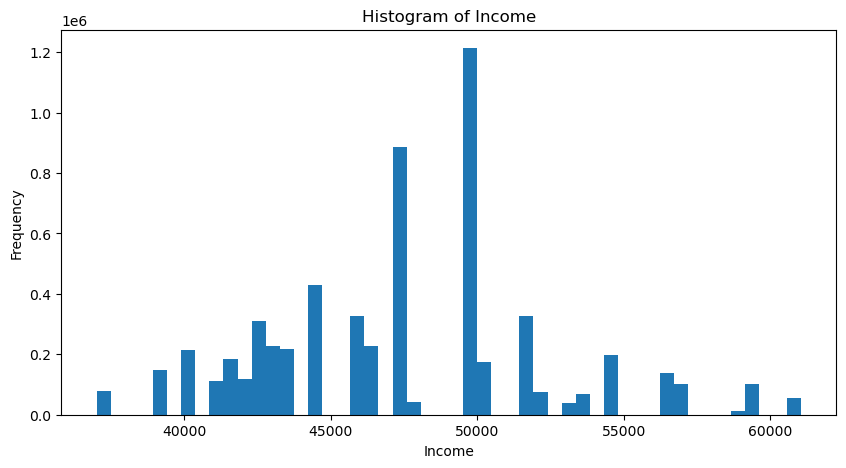

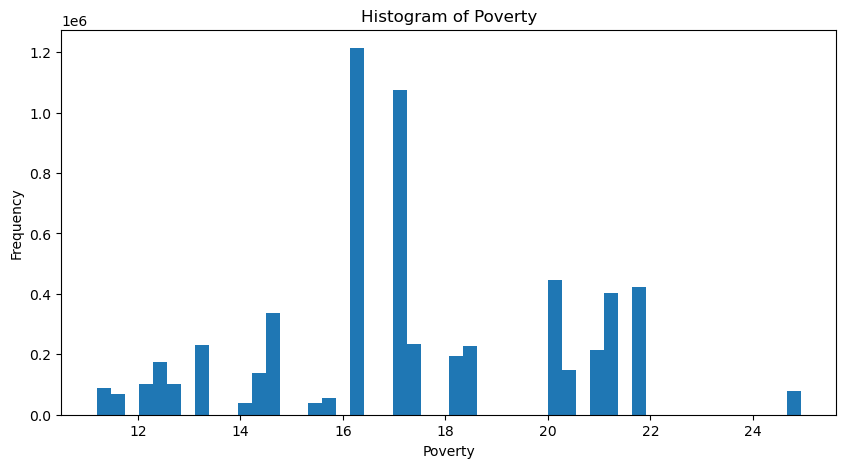

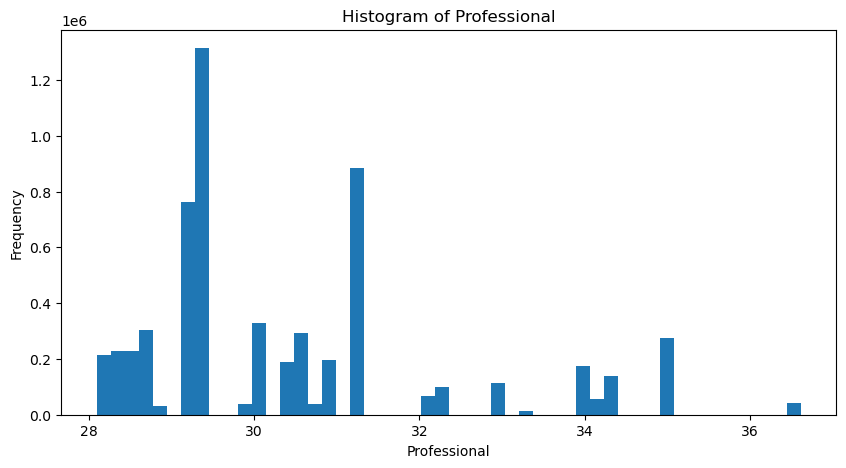

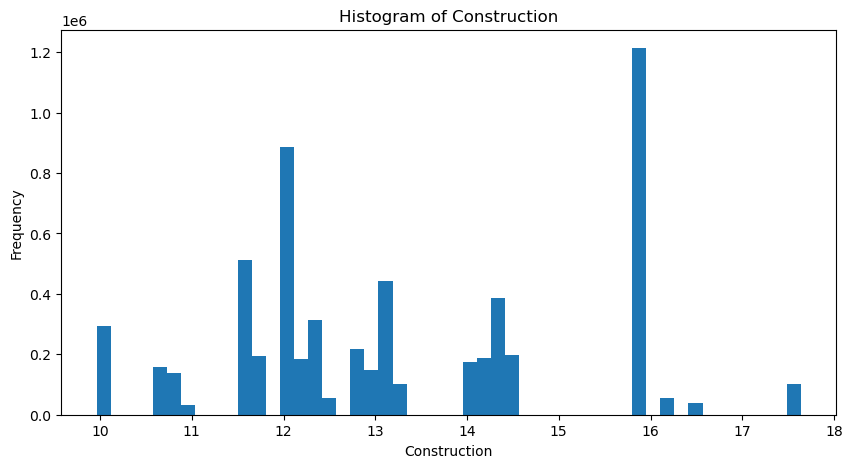

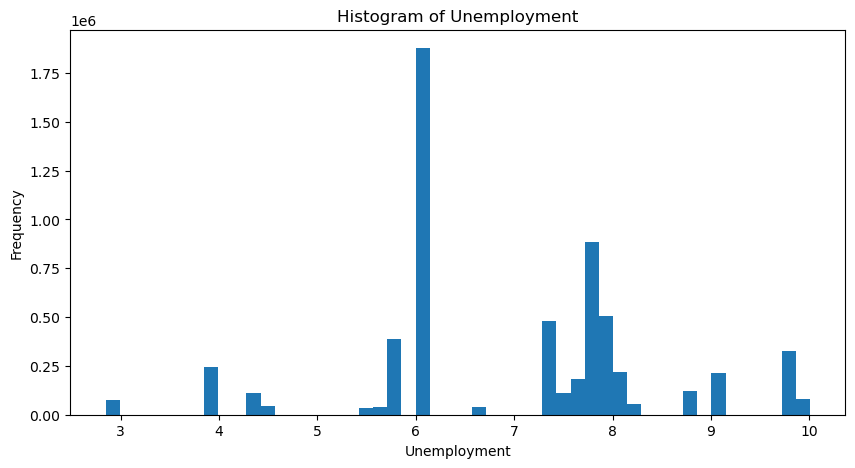

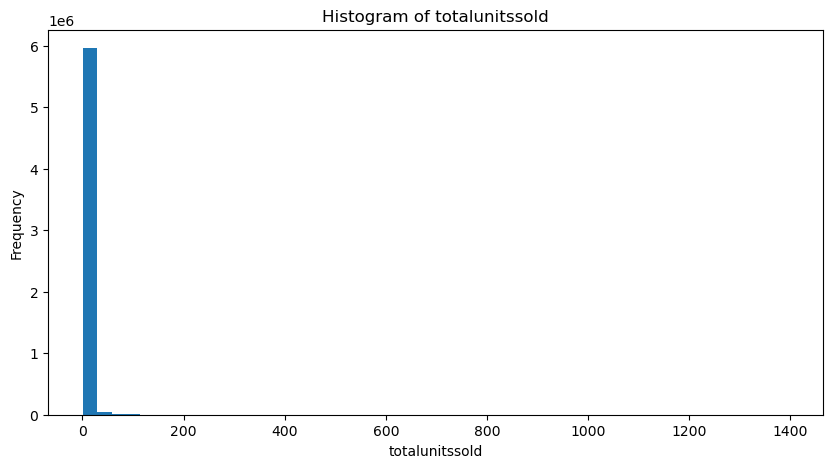

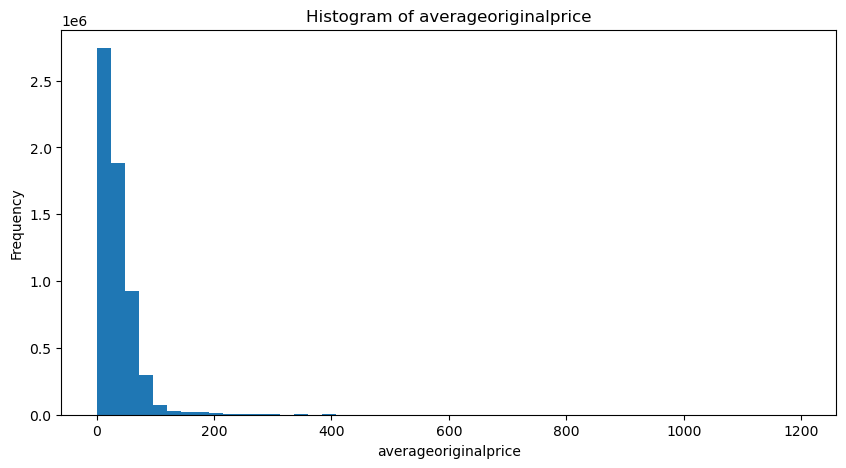

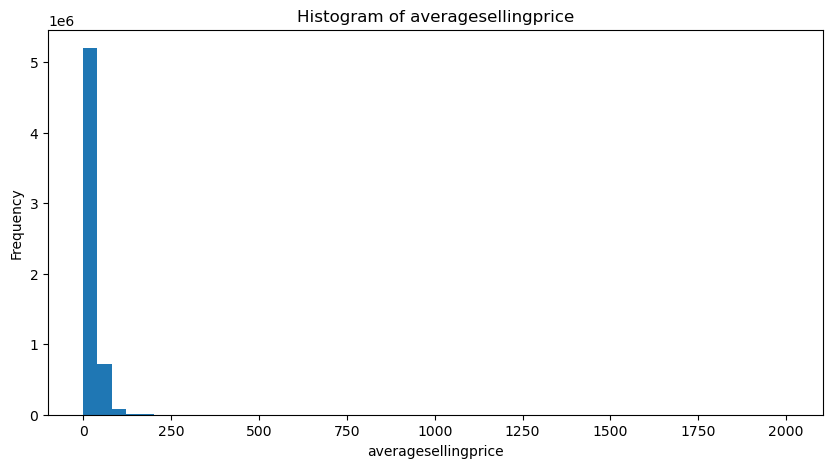

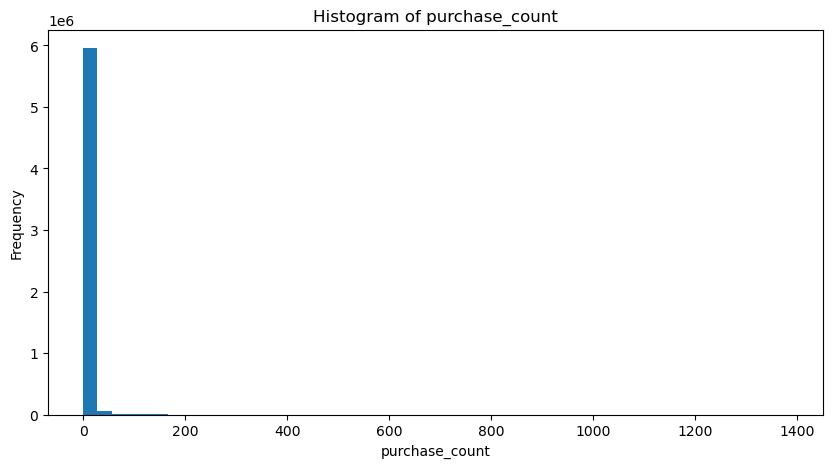

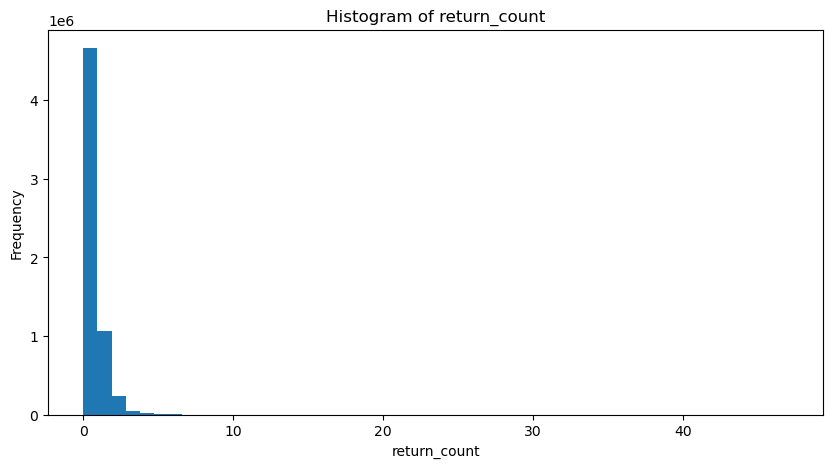

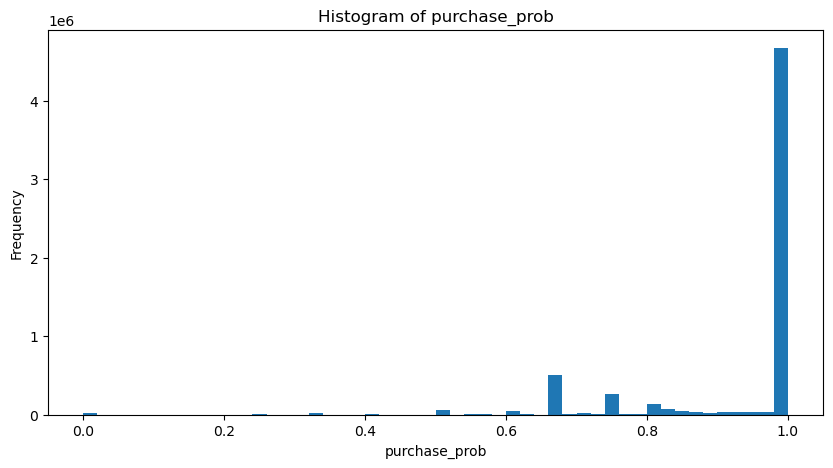

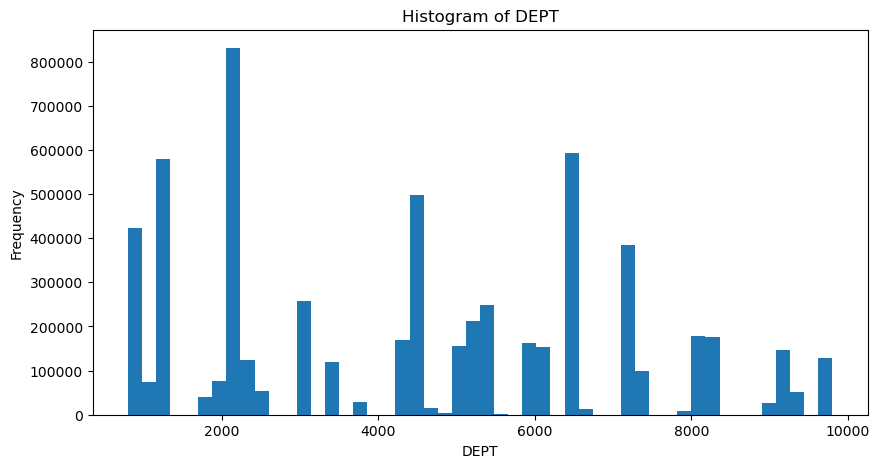

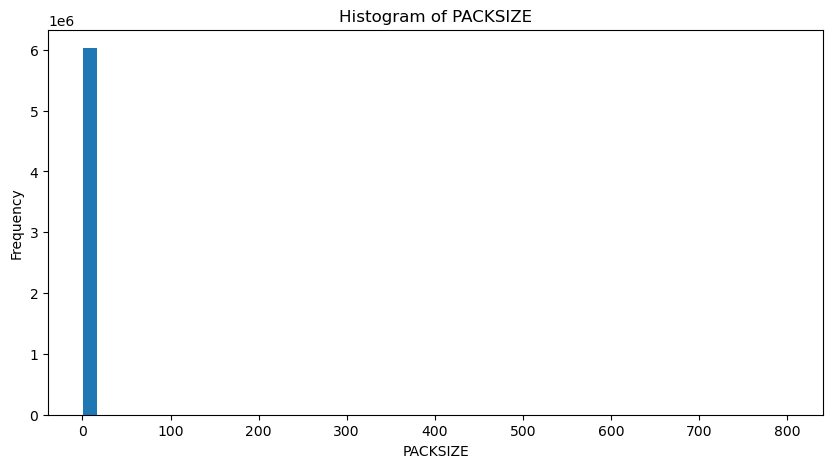

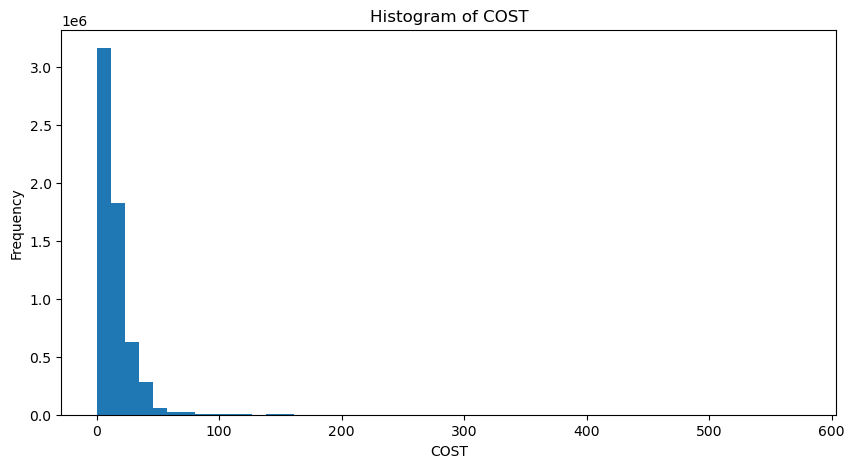

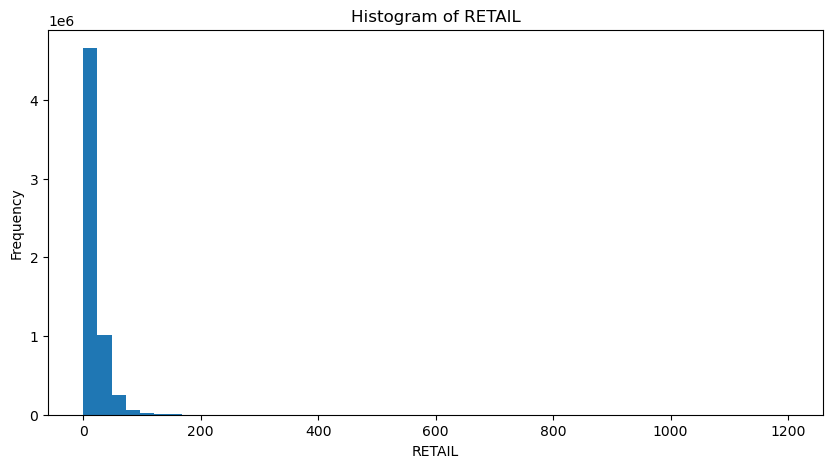

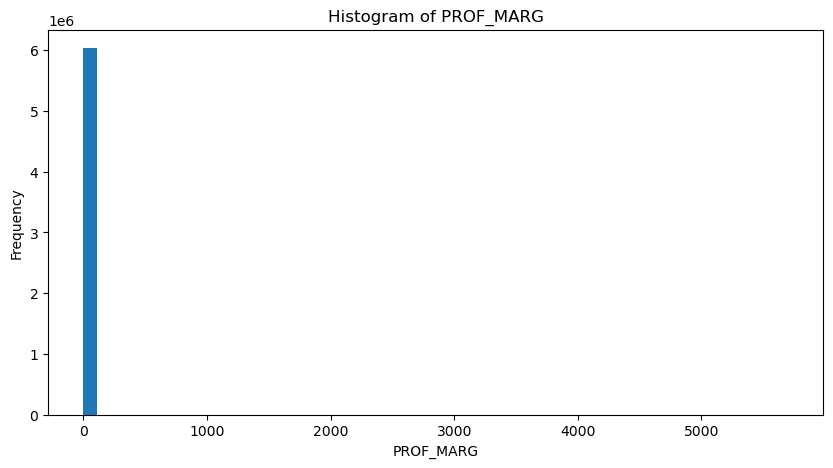

In [24]:
for column in final_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    final_df[column].hist(bins=50)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [12]:

final_df['PROF_MARG'].describe()

count    6.034021e+06
mean     9.971592e-01
std      1.490310e+01
min      0.000000e+00
25%      4.900000e-01
50%      7.000000e-01
75%      1.266667e+00
max      5.700000e+03
Name: PROF_MARG, dtype: float64

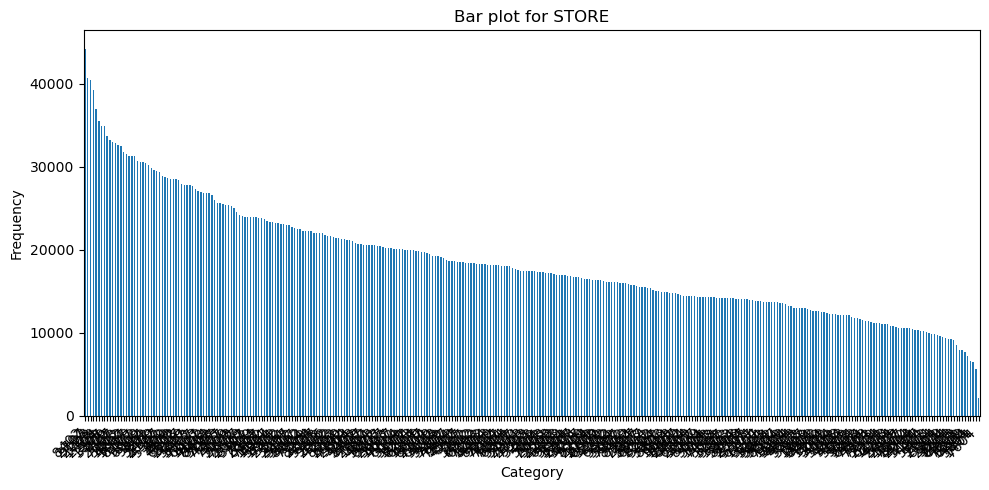

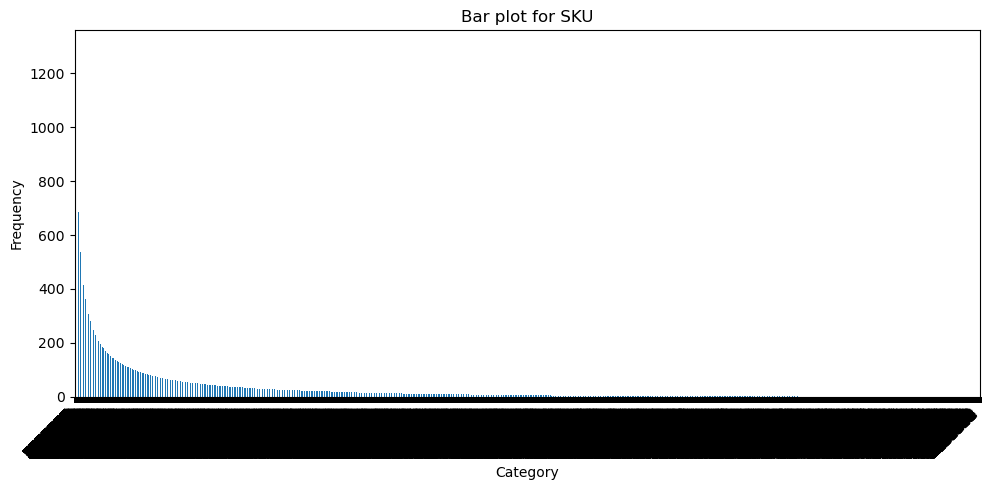

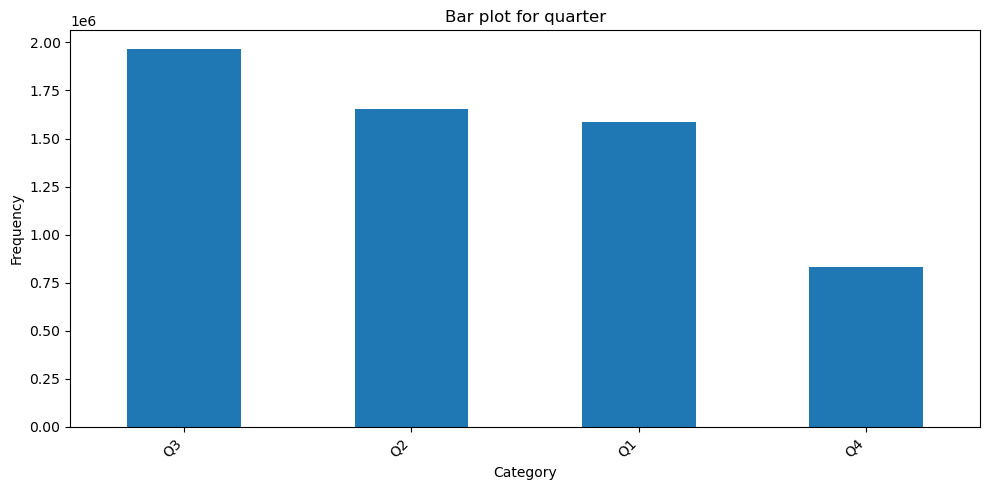

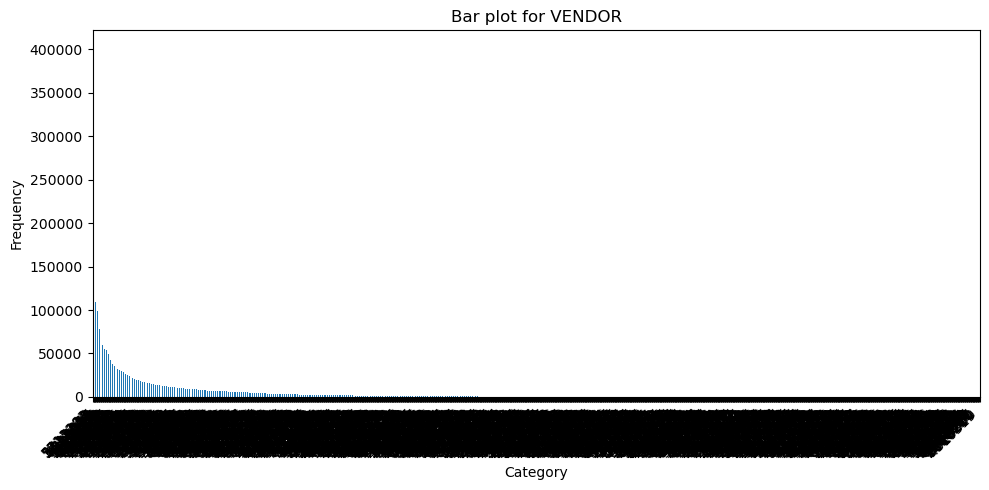

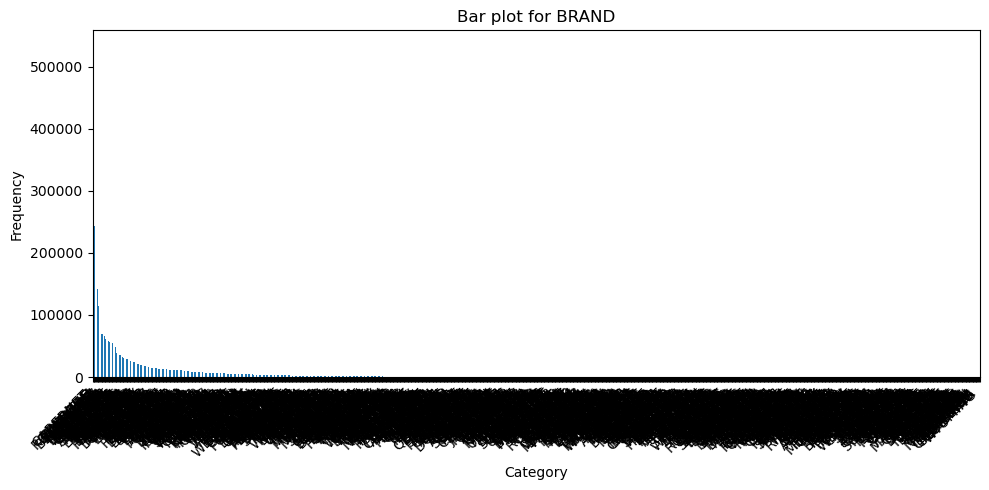

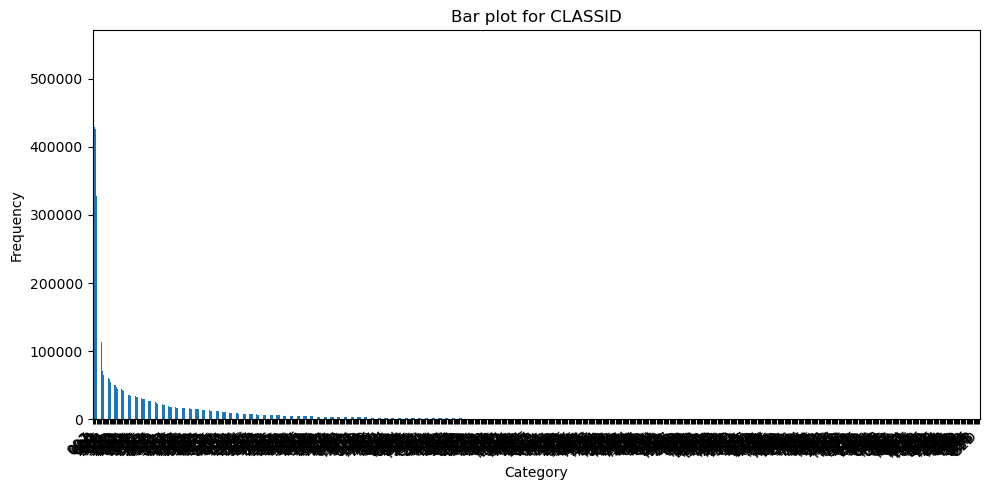

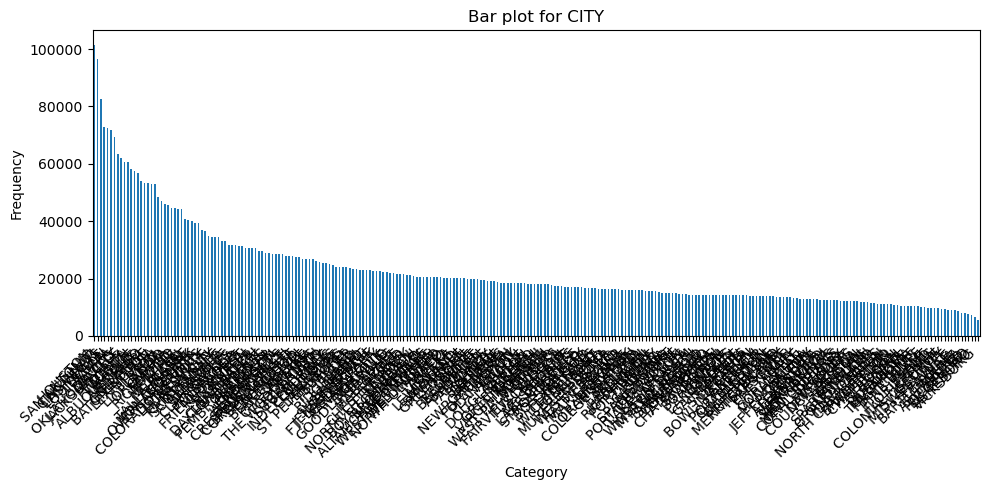

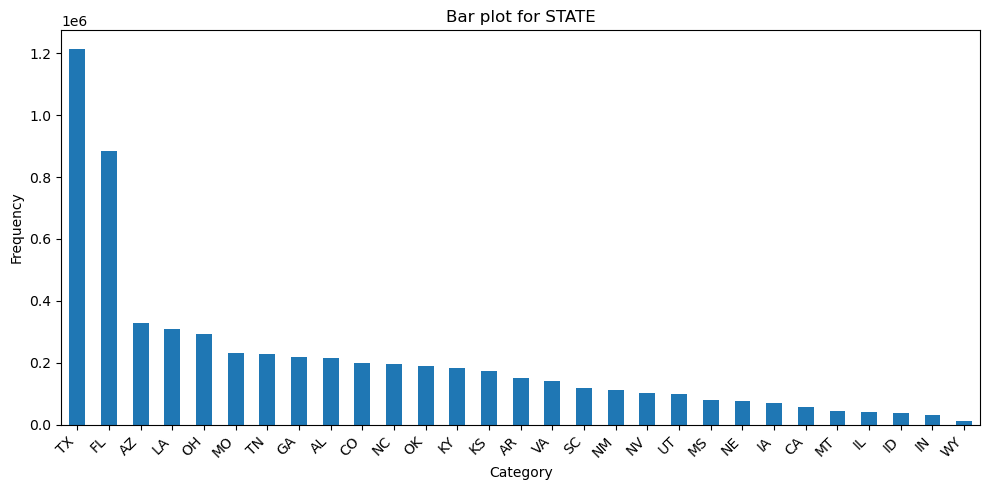

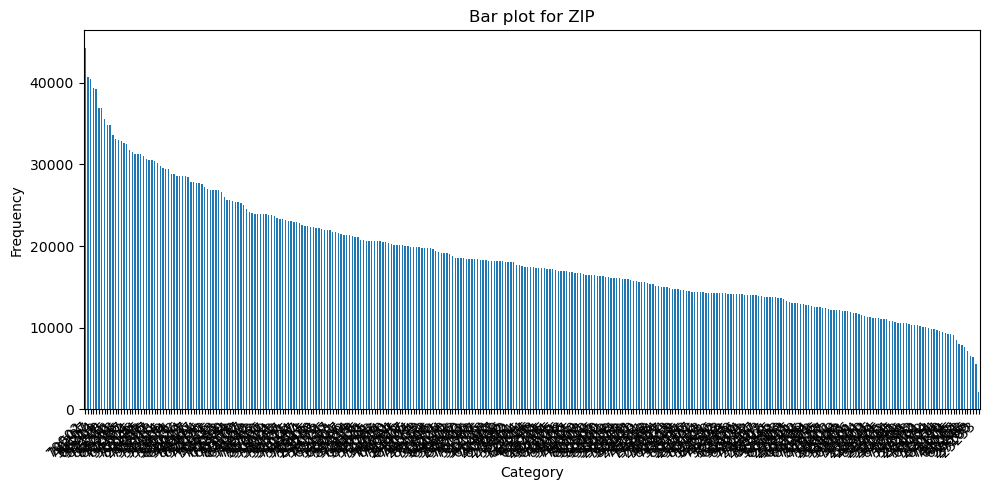

In [13]:
categorical_columns = final_df.select_dtypes(include=['object']).columns

# Plot a bar plot for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 5))  # Adjust the size as needed
    value_counts = final_df[column].value_counts()
    value_counts.plot.bar()
    plt.title(f'Bar plot for {column}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
    plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
    plt.show()

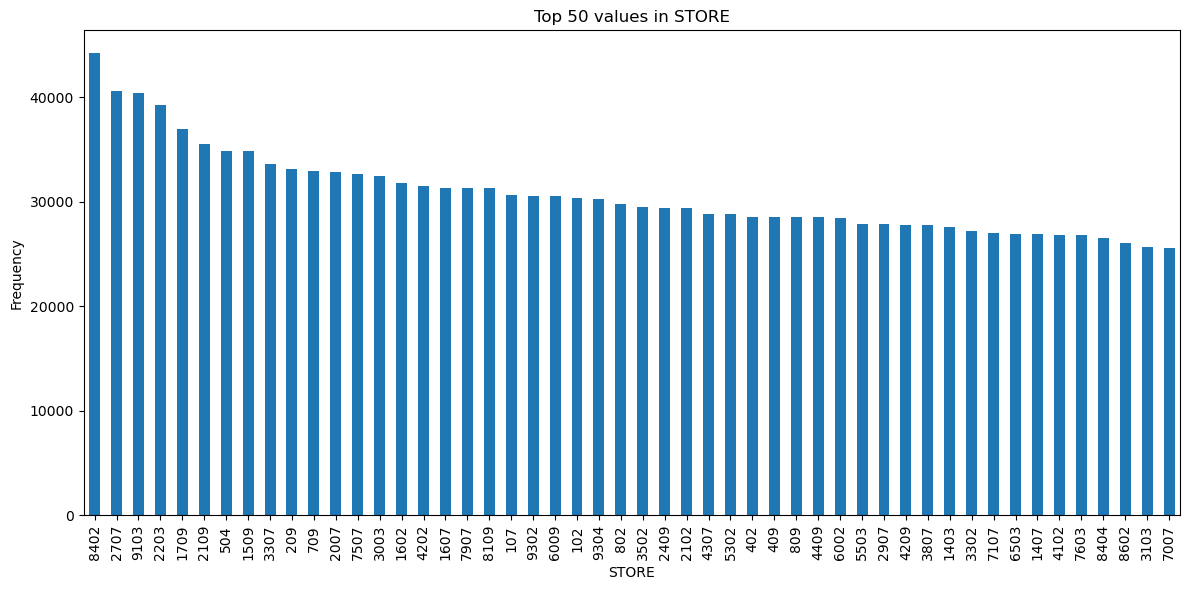

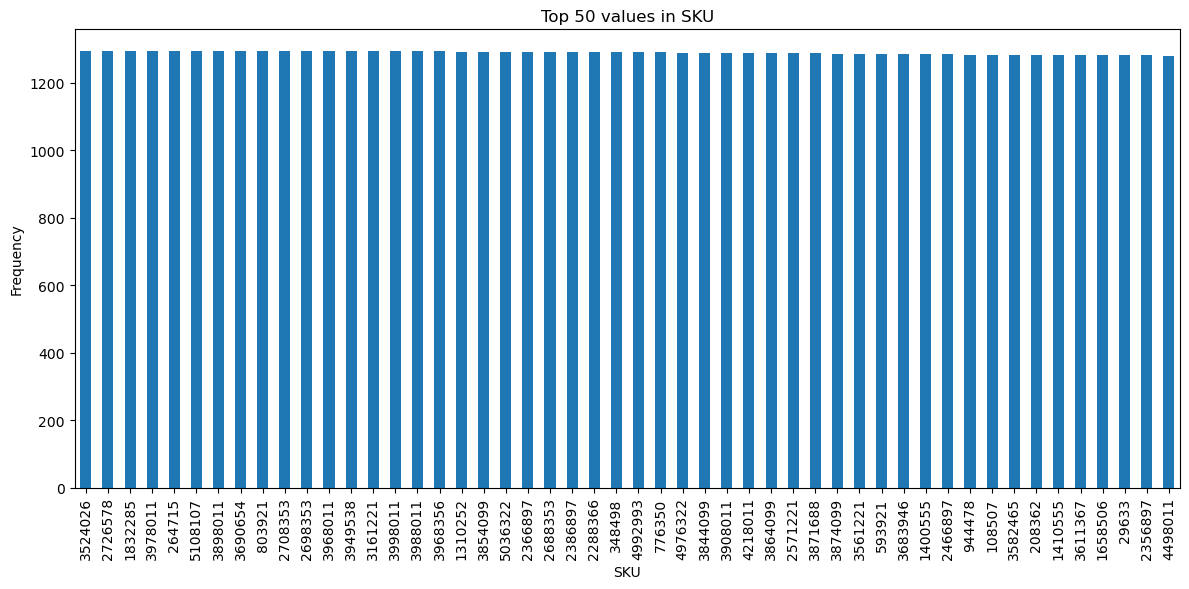

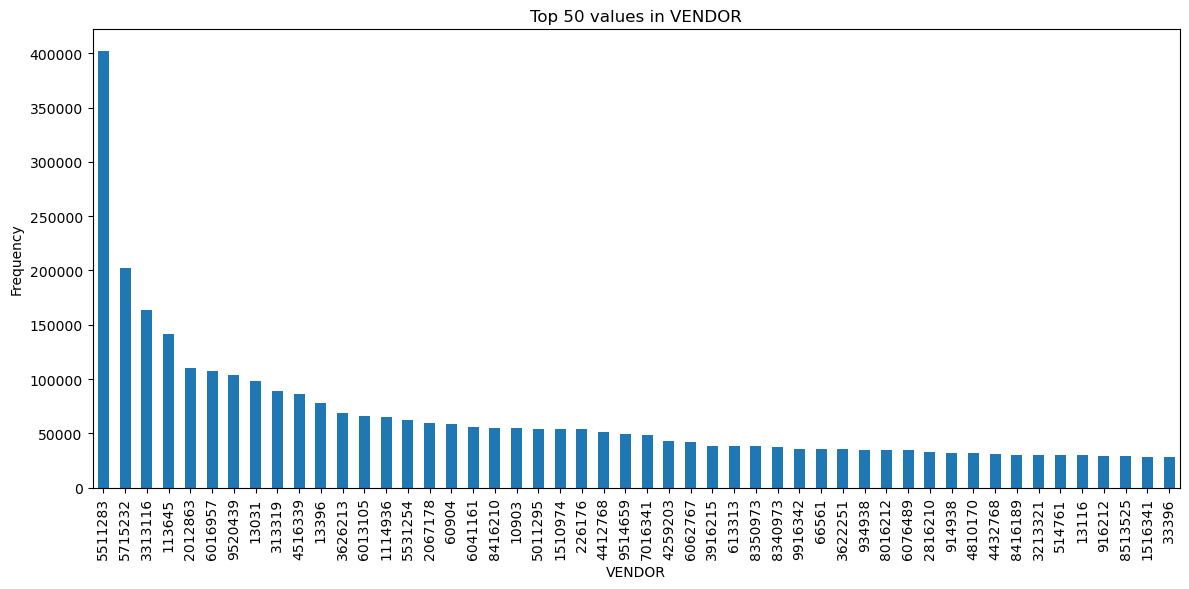

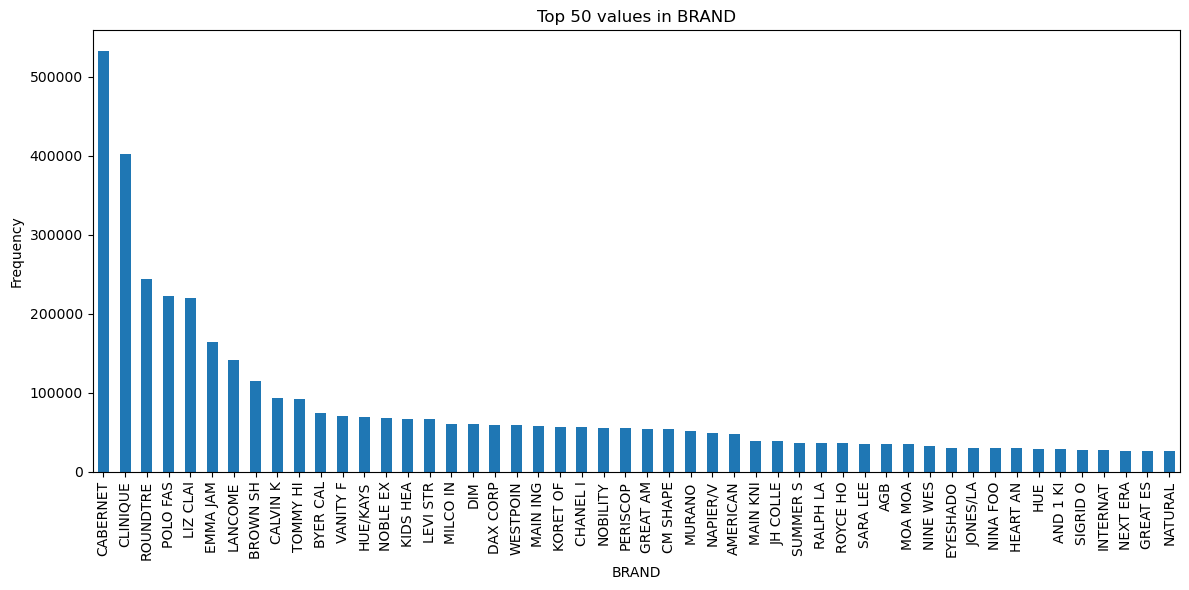

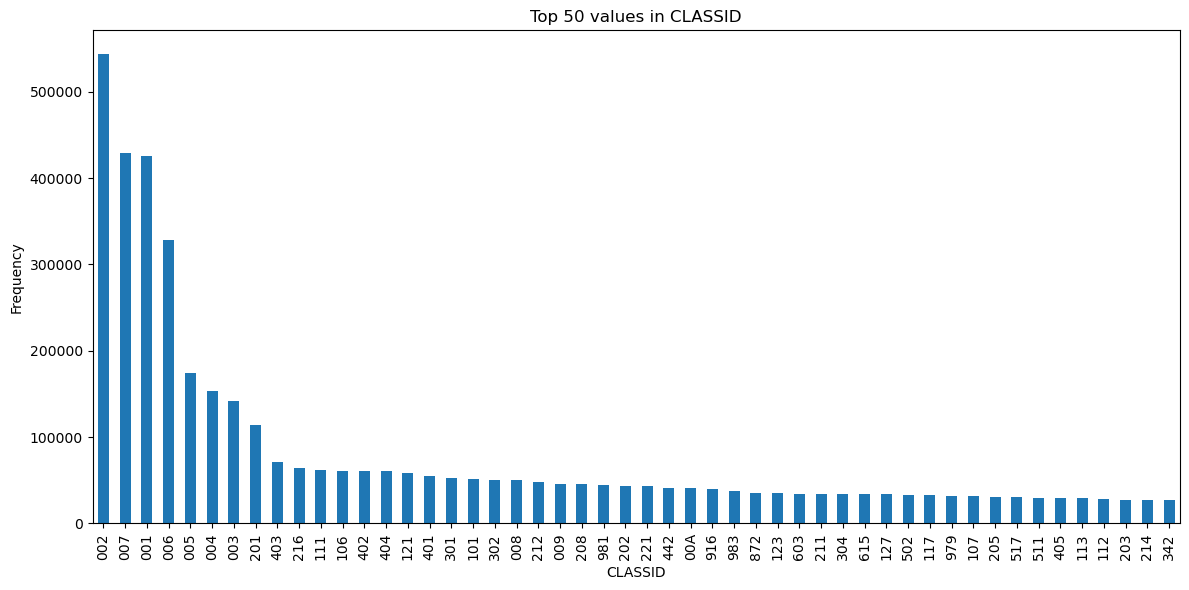

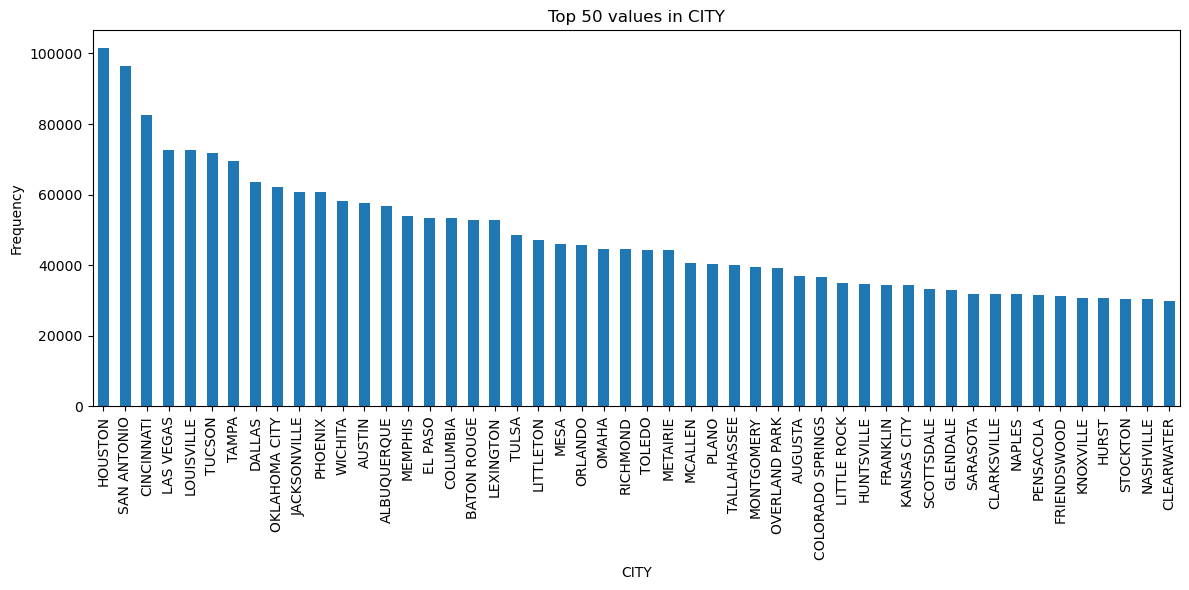

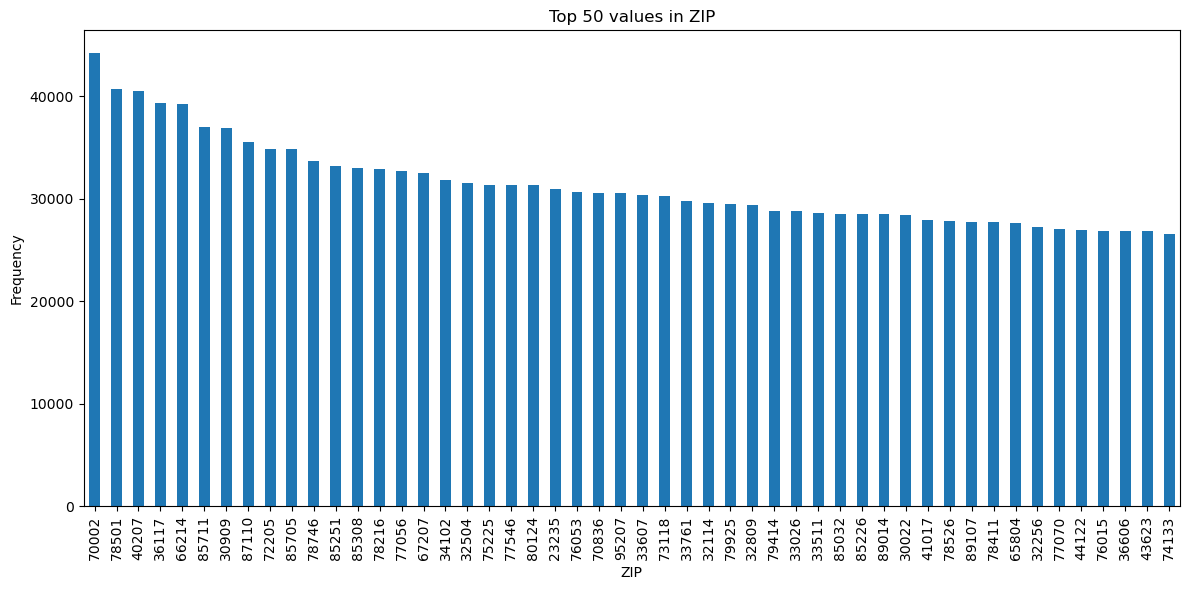

In [14]:
# because there is too any unique cateogries in column brand, classid and city, I will plot a bar graph showing top 50.
columns = ['STORE','SKU','VENDOR','BRAND', 'CLASSID', 'CITY','ZIP']

# Plot a bar plot for the top 50 values of each specified categorical column
for column in columns:
    # Get the value counts and select the top 50
    top_50_values = final_df[column].value_counts().head(50)
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))  # Adjust the size as needed
    top_50_values.plot(kind='bar')
    plt.title(f'Top 50 values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate for better readability, especially if the labels are long
    plt.tight_layout()  # Adjust layout
    plt.show()

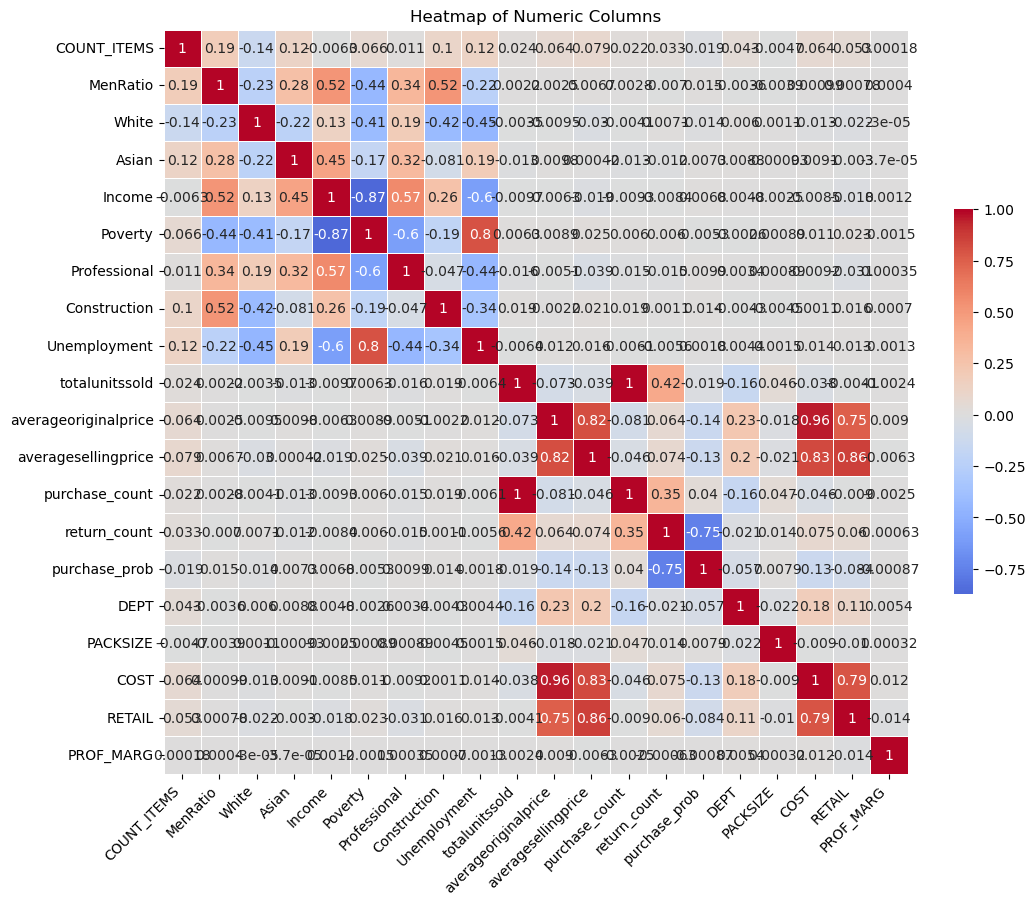

In [15]:
import seaborn as sns
# Select only the numeric columns for the correlation matrix
numeric_cols = final_df.select_dtypes(include=[np.number])

corr = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Customize the axis labels and title for clarity
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Heatmap of Numeric Columns')

# Show the plot
plt.show()